In [32]:
from requests_html import HTMLSession
from time import sleep
from pprint import pprint
import requests
import base64

In [33]:
url = "https://pt.soccerstats247.com/equipas/brasil/flamengo/"
session = HTMLSession()

In [34]:
r = session.get(url)

In [35]:
texto = r.html

In [41]:
ele = texto.find("h1")[0].text
ele

'Flamengo'

In [5]:
lista = texto.find("div[id='statisticsSlider'] tr")

In [6]:
def capturar(elements):
    lista = []
    for i in elements:
        string = i.text
        lista.append(string.split("\n"))
    return lista
def capturar_titulo(elements):
    lista = []
    for i in elements:
        string = i.text
        lista.append(string)
    return lista

In [7]:
dados = capturar(lista)
dados

[['Serie A, Brasil', 'Total', 'Em casa', 'Fora'],
 ['Classificação', '3'],
 ['Partidas Jogadas', '29', '15', '14'],
 ['Vitórias', '16', '10', '6'],
 ['Derrotas', '6', '1', '5'],
 ['Derrotas', '7', '4', '3'],
 ['Golos marcados', '54', '25', '29'],
 ['Golos sofridos', '28', '13', '15'],
 ['Pontos', '54', '31', '23'],
 ['Jogos sem sofrer golos', '11', '7', '4'],
 ['Não conseguiu marcar', '5', '4', '1'],
 ['Méd. de golos marcados p/j', '1,86', '1,67', '2,07'],
 ['Méd. de golos sofridos p/j', '0,97', '0,87', '1,07'],
 ['Média de tempo do 1º golo marcado', '39m', '35m', '43m'],
 ['Média de tempo do 1º golo sofrido', '48m', '48m', '48m'],
 ['Partidas com mais de 2,5 golos', '55,48%', '46,67%', '64,29%'],
 ['Partidas com menos de 2,5 golos', '44,52%', '53,33%', '35,71%'],
 ['Gols marcados', '83,10%', '73,33%', '92,86%'],
 ['Golos sofridos', '62,38%', '53,33%', '71,43%']]

In [8]:
data = {}
data[dados[0][0].split(',')[0]] = dados[0][0].split(',')[1]
data['Classificação'] = {'total': dados[1][1]}
data['Partidas jogadas'] = {'total':dados[2][1], 'Em casa':dados[2][2], 'fora':dados[2][3]}
data['Vitórias'] = {'total':dados[3][1], 'Em casa':dados[3][2], 'fora':dados[3][3]}
data['Empate'] = {'total':dados[4][1], 'Em casa':dados[4][2], 'fora':dados[4][3]}
data['Derrota'] = {'total':dados[5][1], 'Em casa':dados[5][2], 'fora':dados[5][3]}
data['Gols marcados'] = {'total':dados[6][1], 'Em casa':dados[6][2], 'fora':dados[6][3]}
data['Gols sofridos'] = {'total':dados[7][1], 'Em casa':dados[7][2], 'fora':dados[7][3]}
data['pontos'] = {'total':dados[8][1], 'Em casa':dados[8][2], 'fora':dados[8][3]}
data['Jogos sem sofrer gols'] = {'total':dados[9][1], 'Em casa':dados[9][2], 'fora':dados[9][3]}
data['Não conseguiu marcar'] = {'total':dados[10][1], 'Em casa':dados[10][2], 'fora':dados[10][3]}
data['Média de gols marcados por jogo'] = {'total':dados[11][1], 'Em casa':dados[11][2], 'fora':dados[11][3]}
data['Média de gols sofridos por jogo'] = {'total':dados[12][1], 'Em casa':dados[12][2], 'fora':dados[12][3]}
data['Média de tempo do 1° gol marcado'] = {'total':dados[13][1], 'Em casa':dados[13][2], 'fora':dados[13][3]}
data['Média de tempo do 1° gol sofrido'] = {'total':dados[14][1], 'Em casa':dados[14][2], 'fora':dados[14][3]}
data['Partidas com mais de 2,5 gols'] = {'total':dados[15][1], 'Em casa':dados[15][2], 'fora':dados[15][3]}
data['Partidas com menos de 2,5 gols'] = {'total':dados[16][1], 'Em casa':dados[16][2], 'fora':dados[16][3]}
data['Gols marcados em %'] = {'total':dados[17][1], 'Em casa':dados[17][2], 'fora':dados[17][3]}
data['Gols sofridos em %'] = {'total':dados[18][1], 'Em casa':dados[18][2], 'fora':dados[18][3]}
pprint(data)

{'Classificação': {'total': '3'},
 'Derrota': {'Em casa': '4', 'fora': '3', 'total': '7'},
 'Empate': {'Em casa': '1', 'fora': '5', 'total': '6'},
 'Gols marcados': {'Em casa': '25', 'fora': '29', 'total': '54'},
 'Gols marcados em %': {'Em casa': '73,33%',
                        'fora': '92,86%',
                        'total': '83,10%'},
 'Gols sofridos': {'Em casa': '13', 'fora': '15', 'total': '28'},
 'Gols sofridos em %': {'Em casa': '53,33%',
                        'fora': '71,43%',
                        'total': '62,38%'},
 'Jogos sem sofrer gols': {'Em casa': '7', 'fora': '4', 'total': '11'},
 'Média de gols marcados por jogo': {'Em casa': '1,67',
                                     'fora': '2,07',
                                     'total': '1,86'},
 'Média de gols sofridos por jogo': {'Em casa': '0,87',
                                     'fora': '1,07',
                                     'total': '0,97'},
 'Média de tempo do 1° gol marcado': {'Em casa': '35m',
   

In [9]:
def estatistica(dados):
    estatistic = {}
    cont = 0
    for i in dados:
        if cont == 1:
            try:
                estatistic[i[0]] = {"total":i[1]}
            except:
                ...
        elif cont > 1:
            estatistic[i[0]] = {"total": i[1], "em casa":i[2], "fora":i[3]}
        cont += 1
    return estatistic

In [10]:
estatistica(capturar(lista))

{'Classificação': {'total': '3'},
 'Partidas Jogadas': {'total': '29', 'em casa': '15', 'fora': '14'},
 'Vitórias': {'total': '16', 'em casa': '10', 'fora': '6'},
 'Derrotas': {'total': '7', 'em casa': '4', 'fora': '3'},
 'Golos marcados': {'total': '54', 'em casa': '25', 'fora': '29'},
 'Golos sofridos': {'total': '62,38%', 'em casa': '53,33%', 'fora': '71,43%'},
 'Pontos': {'total': '54', 'em casa': '31', 'fora': '23'},
 'Jogos sem sofrer golos': {'total': '11', 'em casa': '7', 'fora': '4'},
 'Não conseguiu marcar': {'total': '5', 'em casa': '4', 'fora': '1'},
 'Méd. de golos marcados p/j': {'total': '1,86',
  'em casa': '1,67',
  'fora': '2,07'},
 'Méd. de golos sofridos p/j': {'total': '0,97',
  'em casa': '0,87',
  'fora': '1,07'},
 'Média de tempo do 1º golo marcado': {'total': '39m',
  'em casa': '35m',
  'fora': '43m'},
 'Média de tempo do 1º golo sofrido': {'total': '48m',
  'em casa': '48m',
  'fora': '48m'},
 'Partidas com mais de 2,5 golos': {'total': '55,48%',
  'em casa':

In [11]:
s = texto.find("#scoringMinutesSlider tr")

In [12]:
def min_gols(dados):
    min_gols = {}
    mg = {}
    cont = 0
    for i in dados:
        mg[i[0]] = i[1]
        cont += 1
    min_gols["Minutos dos gols"] = mg
    
    return min_gols

In [13]:
min_gols(capturar(s))

{'Minutos dos gols': {"0 - 15'": '11.5%',
  "15 - 30'": '17.3%',
  "30 - 45'": '13.5%',
  "45 - 60'": '9.6%',
  "60 - 75'": '23.1%',
  "75 - 90'": '25.0%'}}

In [14]:
v = texto.find("#match9 tr")
t = texto.find("#tabHeaders a")
table_jogo = ['#allLeagues tr', '#match9 tr', '#match10 tr', '#match11 tr', "#match12", "#match13", "#match14", "#match15"]
#"allLeagues"
#match9
#match10
#match11

In [15]:
def jogos(dados):
    jogos = {}
    dado = {}
    cont = 0
    for i in dados:
        cont += 1
        dado["semana"] = i[0]
        dado["data"] = i[1]
        dado["campeonato"] = i[2]
        dado["placar"] = i[4]
        dado["resultado"] = i[3]+" "+i[4]+" "+i[5]
        jogos[cont] = dado
        dado = {}
    return jogos

In [16]:
def partidas():
    table_jogo = ['#allLeagues tr', '#match9 tr', '#match10 tr', '#match11 tr', "#match12", "#match13", "#match14", "#match15"]
    t = texto.find("#tabHeaders a")
    titulos = capturar_titulo(t)
    print(titulos)
    jogo = {}
    cont = 0
    for tit in titulos:
        tb = texto.find(table_jogo[cont])
        dados = capturar(tb)
        jogo[tit] = jogos(dados)
        cont += 1
    return jogo

In [17]:
partidas()

['Todas as Ligas', 'Taça Libertadores', 'Serie A', 'Copa do Brasil']


{'Todas as Ligas': {1: {'semana': 'seg',
   'data': '08/11/2021',
   'campeonato': 'Serie A',
   'placar': '2 - 2',
   'resultado': 'Chapecoense 2 - 2 Flamengo'},
  2: {'semana': 'sáb',
   'data': '06/11/2021',
   'campeonato': 'Serie A',
   'placar': '2 - 0',
   'resultado': 'Flamengo 2 - 0 Atlético Goianiense'},
  3: {'semana': 'ter',
   'data': '02/11/2021',
   'campeonato': 'Serie A',
   'placar': '2 - 2',
   'resultado': 'Athletico Paranaense 2 - 2 Flamengo'},
  4: {'semana': 'sáb',
   'data': '30/10/2021',
   'campeonato': 'Serie A',
   'placar': '1 - 0',
   'resultado': 'Flamengo 1 - 0 Atlético Mineiro'},
  5: {'semana': 'qui',
   'data': '28/10/2021',
   'campeonato': 'Copa do Brasil',
   'placar': '0 - 3',
   'resultado': 'Flamengo 0 - 3 Athletico Paranaense'},
  6: {'semana': 'sáb',
   'data': '23/10/2021',
   'campeonato': 'Serie A',
   'placar': '3 - 1',
   'resultado': 'Fluminense 3 - 1 Flamengo'},
  7: {'semana': 'qui',
   'data': '21/10/2021',
   'campeonato': 'Copa do B

In [19]:
capturar(v)

[['qui', '30/09/2021', 'Taça Libertadores', 'Barcelona', '0 - 2', 'Flamengo'],
 ['qui', '23/09/2021', 'Taça Libertadores', 'Flamengo', '2 - 0', 'Barcelona'],
 ['qua', '18/08/2021', 'Taça Libertadores', 'Flamengo', '5 - 1', 'Olimpia'],
 ['qua', '11/08/2021', 'Taça Libertadores', 'Olimpia', '1 - 4', 'Flamengo'],
 ['qui',
  '22/07/2021',
  'Taça Libertadores',
  'Flamengo',
  '4 - 1',
  'Defensa y Justicia'],
 ['qui',
  '15/07/2021',
  'Taça Libertadores',
  'Defensa y Justicia',
  '0 - 1',
  'Flamengo'],
 ['sex',
  '28/05/2021',
  'Taça Libertadores',
  'Flamengo',
  '0 - 0',
  'Vélez Sarsfield'],
 ['qui', '20/05/2021', 'Taça Libertadores', 'Flamengo', '2 - 2', 'LDU Quito'],
 ['qua',
  '12/05/2021',
  'Taça Libertadores',
  'Unión La Calera',
  '2 - 2',
  'Flamengo'],
 ['qua', '05/05/2021', 'Taça Libertadores', 'LDU Quito', '2 - 3', 'Flamengo']]

In [20]:
jogos(capturar(v))

{1: {'semana': 'qui',
  'data': '30/09/2021',
  'campeonato': 'Taça Libertadores',
  'placar': '0 - 2',
  'resultado': 'Barcelona 0 - 2 Flamengo'},
 2: {'semana': 'qui',
  'data': '23/09/2021',
  'campeonato': 'Taça Libertadores',
  'placar': '2 - 0',
  'resultado': 'Flamengo 2 - 0 Barcelona'},
 3: {'semana': 'qua',
  'data': '18/08/2021',
  'campeonato': 'Taça Libertadores',
  'placar': '5 - 1',
  'resultado': 'Flamengo 5 - 1 Olimpia'},
 4: {'semana': 'qua',
  'data': '11/08/2021',
  'campeonato': 'Taça Libertadores',
  'placar': '1 - 4',
  'resultado': 'Olimpia 1 - 4 Flamengo'},
 5: {'semana': 'qui',
  'data': '22/07/2021',
  'campeonato': 'Taça Libertadores',
  'placar': '4 - 1',
  'resultado': 'Flamengo 4 - 1 Defensa y Justicia'},
 6: {'semana': 'qui',
  'data': '15/07/2021',
  'campeonato': 'Taça Libertadores',
  'placar': '0 - 1',
  'resultado': 'Defensa y Justicia 0 - 1 Flamengo'},
 7: {'semana': 'sex',
  'data': '28/05/2021',
  'campeonato': 'Taça Libertadores',
  'placar': '0 

In [21]:
#squadSlider
ele = texto.find("#squadSlider tr")

In [22]:
capturar(ele)

[['Nome', 'Posição'],
 ['57',
  'André Luiz',
  'Avançado',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['18',
  'Andreas Pereira',
  'Médio',
  '939',
  '13',
  '11',
  '2',
  '8',
  '3',
  '0,23',
  '3',
  '0',
  '0'],
 ['27',
  'Bruno Henrique',
  'Avançado',
  '1477',
  '18',
  '17',
  '1',
  '8',
  '9',
  '0,5',
  '6',
  '0',
  '0'],
 ['30',
  'Bruno Viana',
  'Defesa',
  '522',
  '11',
  '6',
  '5',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0'],
 ['37',
  'César',
  'Guarda-redes',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['49', 'Cleiton', 'Defesa', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
 ['0',
  'Daniel Cabral',
  'Médio',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['23',
  'David Luiz',
  'Defesa',
  '90',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['0', 'Diegão', 'Defesa', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
 ['10',
  'Diego',
  'Médio',
  '1042'

In [29]:
def equipe(dados):
    jogadores = {}
    cont = 0
    for dado in dados:
        try:
            jogadores[dado[1]] = {"camisa":dado[0],"nome":dado[1],"pocição":dado[2],"minutos jogados":dado[3],"comparecimento":dado[4],"convocação":dado[5],"jogador a entrar":dado[6],"jogador a sair":dado[7],"gols":dado[8],"média de gols por comparência":dado[9],"cartão amarelo":dado[10],"catões vermelho amarelo":dado[11],"cartões vermelho":dado[12]}
        except:
            ...
        cont += 1
    return jogadores

In [30]:
equipe(capturar(ele))

{'André Luiz': {'camisa': '57',
  'nome': 'André Luiz',
  'pocição': 'Avançado',
  'minutos jogados': '0',
  'comparecimento': '0',
  'convocação': '0',
  'jogador a entrar': '0',
  'jogador a sair': '0',
  'gols': '0',
  'média de gols por comparência': '0',
  'cartão amarelo': '0',
  'catões vermelho amarelo': '0',
  'cartões vermelho': '0'},
 'Andreas Pereira': {'camisa': '18',
  'nome': 'Andreas Pereira',
  'pocição': 'Médio',
  'minutos jogados': '939',
  'comparecimento': '13',
  'convocação': '11',
  'jogador a entrar': '2',
  'jogador a sair': '8',
  'gols': '3',
  'média de gols por comparência': '0,23',
  'cartão amarelo': '3',
  'catões vermelho amarelo': '0',
  'cartões vermelho': '0'},
 'Bruno Henrique': {'camisa': '27',
  'nome': 'Bruno Henrique',
  'pocição': 'Avançado',
  'minutos jogados': '1477',
  'comparecimento': '18',
  'convocação': '17',
  'jogador a entrar': '1',
  'jogador a sair': '8',
  'gols': '9',
  'média de gols por comparência': '0,5',
  'cartão amarelo

In [244]:
texto.find("#upCalendar > table > tbody > tr > td:nth-child(2) h1")

[]

In [78]:
url = "https://www.soccerstats.com/latest.asp?league=france3"
session = HTMLSession()
r = session.get(url)
texto = r.html #btable

In [79]:
c = texto.find("#content > div:nth-child(9) > div:nth-child(4) > table:nth-child(9) tr")
t = "".join("".join([x.text for x in c]).split("\n"))
t

'This season in the league: Annecy are leading the table in the league and are 1 point clear off Bourg-en-Bresse in second position, and 2 points ahead of 3rd-place Concarneau.Annecy did not concede any goal in their last 5 home matches.Bourg-en-Bresse have been undefeated in their last 5 away matches.Concarneau have won their last 4 matches.The links in the league standings above allow displaying results and statistics for each team, likeAnnecy statsorBourg-en-Bresse statswhile other indicators accessible from the page relate to level-level France - National stats and tables.'

''
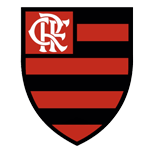

In [30]:
#soccerContentPlaceHolder_imgTeamLogo
v = texto.find("#soccerContentPlaceHolder_imgTeamLogo")
v = v[0]
v = (v.attrs)['src']
v

In [32]:
def salva_imagem(base, time):
    data = (base.replace('data:image/png;base64,', '')).replace(' ', '+')
    imgdata = base64.b64decode(data)
    filename = f'{time}.jpg'  # I assume you have a way of picking unique filenames
    with open(filename, 'wb') as f:
        f.write(imgdata)

In [33]:
salva_imagem(v, "flamengo")

In [37]:
s = '#teamProfileSlider > div > table > tbody > tr > td:nth-child(1) > div:nth-child(3)'
a = texto.find(s)
a

AttributeError: 'list' object has no attribute 'text'